##### Домашнее задание "Проблема качества данных"  
**Преподаватель:** Алексей Миронов, Наталья Баданина, Дарья Максимова  
    
Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции.  
По образу практики, попробуйте создать искусственный датасет с лишними столбцами. 
Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. 
Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. 
Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. 
Данное задание не имеет какого-то “правильного” решения. 
Цель - достичь базового понимания проблемы. 
Чем больше вы фантазируете, тем лучше :) 
Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. **Успеха!**

In [1]:
# Загружаем библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


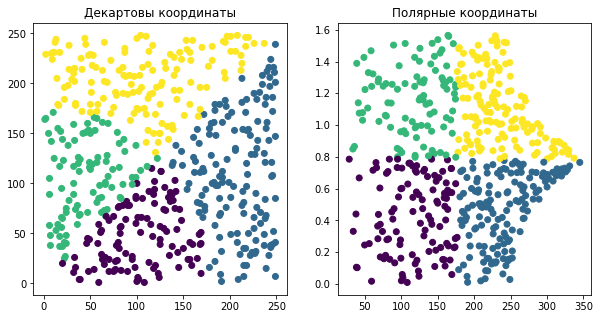

In [2]:
n_samples = 500
interval  = 250

#X,Y - декартовы координаты
X   = np.random.randint(1, interval, n_samples)
Y   = np.random.randint(1, interval, n_samples)
#L,DEG - полярные кооринаты
L   = ((X**2 + Y**2)**0.5)
DEG = np.array([math.atan(y/x) for x,y in zip(X,Y)])

#Классификация точек по 4 классам см.scatter ниже
def set_class(l_, deg_):
    border = (2*(interval**2))**0.5/2
    ret = 0
    if deg_ <= math.pi/4:
        if l_ < border:
            ret = 0
        else:
            ret = 1
    else:
        if l_ < border:
            ret = 2
        else:
            ret = 3
    return ret

class_ = np.array(list(map(set_class, L, DEG)))

data_d = pd.DataFrame({'X':X, 'Y':Y,   'CLASS_':class_})
data_p = pd.DataFrame({'X':L, 'Y':DEG, 'CLASS_':class_})

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Декартовы координаты')
ax[1].set_title('Полярные координаты')
ax[0].scatter(X, Y, c = class_)
ax[1].scatter(L, DEG, c = class_)


In [3]:
#Тестируем логистическую ререссию для классификации данных
def test_model(model_, data):
    data_train, data_test, rez_train, rez_test = train_test_split( data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)
    model_.fit(data_train, rez_train)
    ret = {'Средняя абсолютная ошибка': round(mean_absolute_error( model_.predict(data_test), 
                                                             rez_test ), 2),
           'Оценка': round(model_.score(data_test, 
                                        rez_test), 2)}
    return ret

model1 = LogisticRegression()
print(f'Тестирование модели чистые данные оценка качества кластеризации:\n\
Декартовы координаты - {test_model(model1, data_d)} \n\
Полярные координаты - {test_model(model1, data_p)}' )

# Качество работы классификатора высокий > 90%

Тестирование модели чистые данные оценка качества кластеризации:
Декартовы координаты - {'Средняя абсолютная ошибка': 0.05, 'Оценка': 0.95} 
Полярные координаты - {'Средняя абсолютная ошибка': 0.15, 'Оценка': 0.92}


D:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [4]:
#Что будет если мы увеличим дисперсию +/- 1000 по четным и не четным индексам
def destroy(array_):
    ret = array_
    for i in range(0, len(array_)):
        if i % 2 == 0:
            ret[i] = ret[i] + 1000
        else:
            ret[i] = ret[i] - 1000
    return(ret) 

data_d_new = data_d.copy()
data_d_new['Y'] = destroy(Y)
model2 = LogisticRegression()
test_model(model2, data_d_new)

#Качество модели существенно ухудшилась (~60%)


D:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Средняя абсолютная ошибка': 0.82, 'Оценка': 0.63}

In [5]:
# Посмотрим как поведет себя модель если на полярных координатах (data_p) 
# значение угла (Y) для половины признаков переведем в градусы
# оставшаяся часть будет в радианах

data_p_new = data_p.copy()
data_p_new['Y'] = pd.concat( [data_p['Y'].iloc[:250],  data_p['Y'].iloc[250:].apply(lambda x: x * (180/math.pi))] )
model3 = LogisticRegression()
test_model(model3, data_p_new)

#Качество модели существенно ухудшилась (~60%)

D:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Средняя абсолютная ошибка': 0.71, 'Оценка': 0.64}

In [6]:
# Попробуем многократно продублировать наши данные и оценить качество классификации
x_col = 100*['X']
y_col = 100*['Y']
data = pd.concat( [ data_d[x_col + y_col], data_p[x_col + y_col], data_p ], axis = 1)
model4 = LogisticRegression()
test_model(model4, data)

#Качество модели незначительно ухудшилось (~80%)

D:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Средняя абсолютная ошибка': 0.12, 'Оценка': 0.89}

In [7]:
#Проведем работу аналогичную практике на основе имеющихся данных

# 'TARGET' - целевой признак 
# 'VARadd' - важный признак по отношению к целевому
coeff = [123, 87]
data = pd.DataFrame({ 'X':X, 'Y': Y, 'L': L, 'DEG': DEG, 'VARadd':X*Y, 'TARGET': (X*Y*coeff[0] + coeff[1]) })

print(f'------ {coeff} ------')

model4 = LinearRegression()

rez = test_model(model4, data[ ['X', 'Y', 'L', 'DEG', 'TARGET'] ])
print( f'1.Результат (лишние признаки без важного признака)\n{rez},\nКоэффициенты:{model4.coef_}\nСмещение: {model4.intercept_}\n' )

rez = test_model(model4, data)
print( f'2.Результат (лишние признаки + важный признак "VARadd")\n{rez},\nКоэффициенты: {model4.coef_}\nСмещение: {model4.intercept_}\n' )

rez = test_model(model4, data[['VARadd', 'TARGET']])
print( f'3.Результат (Только важный признак "VARadd")\n{rez},\nКоэффициенты: {model4.coef_}\nСмещение: {model4.intercept_}\n' )

# Формируем полиномиальный набор призанков 2-й степени (по-умолчанию) x0 - X, x1 - Y, x2 - L, x3 - DEG
# poly.get_feature_names() - ['1', 'x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3']
# interaction_only=True, исключаем умножение признака сам на себя
poly = PolynomialFeatures(interaction_only=True)
data_poly = pd.DataFrame( poly.fit_transform(data[['X', 'Y', 'L', 'DEG']]) )
rez = test_model(model4, pd.concat([data_poly, data[['TARGET']]], axis = 1) )
print( f'4.Результат (Полиномиальный набор признаков)\n{rez},\nКоэффициенты: {model4.coef_}\nСмещение: {model4.intercept_}\n' )

------ [123, 87] ------
1.Результат (лишние признаки без важного признака)
{'Средняя абсолютная ошибка': 7599871.9, 'Оценка': 0.75},
Коэффициенты:[  51877.93651041   15202.28381967  -19234.51022974 1944994.20501909]
Смещение: -4402147.536247367

2.Результат (лишние признаки + важный признак "VARadd")
{'Средняя абсолютная ошибка': 0.0, 'Оценка': 1.0},
Коэффициенты: [ 6.93234241e-11  9.81629009e-12 -3.24387399e-11  5.13865547e-09
  1.23000000e+02]
Смещение: 86.9999999939464

3.Результат (Только важный признак "VARadd")
{'Средняя абсолютная ошибка': 0.0, 'Оценка': 1.0},
Коэффициенты: [123.]
Смещение: 87.00000000139698

4.Результат (Полиномиальный набор признаков)
{'Средняя абсолютная ошибка': 0.0, 'Оценка': 1.0},
Коэффициенты: [ 0.00000000e+00  8.12500730e-11 -3.83074740e-12 -1.60419514e-10
 -4.98657873e-10  1.23000000e+02  1.21014828e-13 -1.05143348e-10
 -3.14070224e-14 -3.43811285e-12  1.21640252e-10]
Смещение: 87.0000000083819

